# Report Classical planning

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import seaborn as sns

df = pd.read_csv('results.csv').astype({'Expansions':'int32'})

***Which algorithm or algorithms would be most appropriate for planning in a very restricted domain (i.e., one that has only a few actions) and needs to operate in real time?***  
Based on the plot below of Search time vs. actions, it woul be advised to choose one of the models in the lower lefter corner. From this data greedy best first with the unmet goals heuristic, but BFS, DFS, uniform search and A*(unmet heuristic)

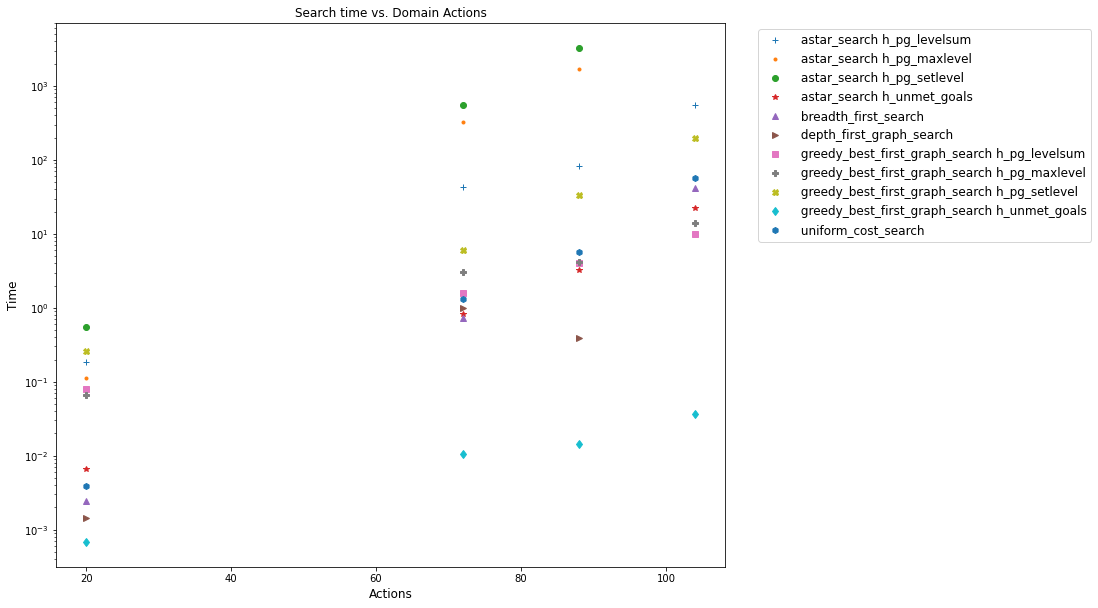

In [43]:
marker = itertools.cycle(('+', '.', 'o', '*', '^', '>', 's', 'P', 'X', 'd', 'h')) 
groups = df.groupby(by='Algo')
plt.figure(figsize=(12,10))
plt.title('Search time vs. Domain Actions', size=12)
for group, data in groups:
    plt.plot(data['Actions'], data['Time'], next(marker), label=group)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left", prop={'size': 12})
plt.yscale('log')
plt.xlabel('Actions', size=12)
plt.ylabel('Time',size=12 )
plt.show()

***Which algorithm or algorithms would be most appropriate for planning in very large domains (e.g., planning delivery routes for all UPS drivers in the U.S. on a given day)?***  
The greedy best first search would be best, as the node expansions are low and they finish the search fast. Altough choice of heuristic seems important here because the GFS with the setlevel heuristic losses to uniform and BFS.

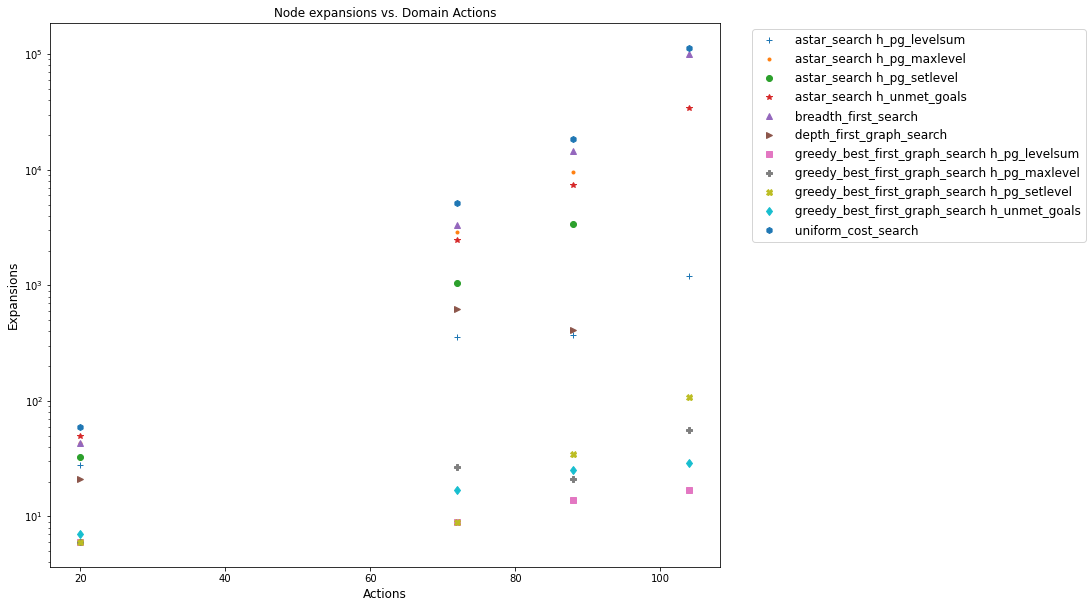

In [44]:
groups = df.groupby(by='Algo')
marker = itertools.cycle(('+', '.', 'o', '*', '^', '>', 's', 'P', 'X', 'd', 'h')) 
plt.figure(figsize=(12,10))
plt.title('Node expansions vs. Domain Actions', size=12)
for group, data in groups:
	plt.plot(data['Actions'], data['Expansions'], next(marker),label=group)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left", prop={'size': 12})
plt.yscale('log')
plt.xlabel('Actions', size=12)
plt.ylabel('Expansions', size=12)
plt.show()

***Which algorithm or algorithms would be most appropriate for planning problems where it is important to find only optimal plans?***  
BFS, Uniform cost and the A* aglorithms.

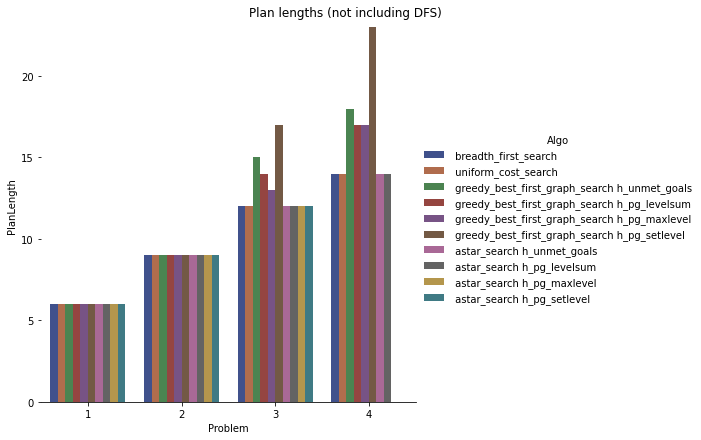

In [50]:
g = sns.catplot(
    data=df.loc[df.Num!=2], kind="bar",
    x="Problem", y="PlanLength", hue="Algo",
    palette="dark",
    alpha=.8,
    height=6
)
g.despine(left=True)
g.fig.suptitle('Plan lengths (not including DFS)')
plt.show()

Same plot with DFS included

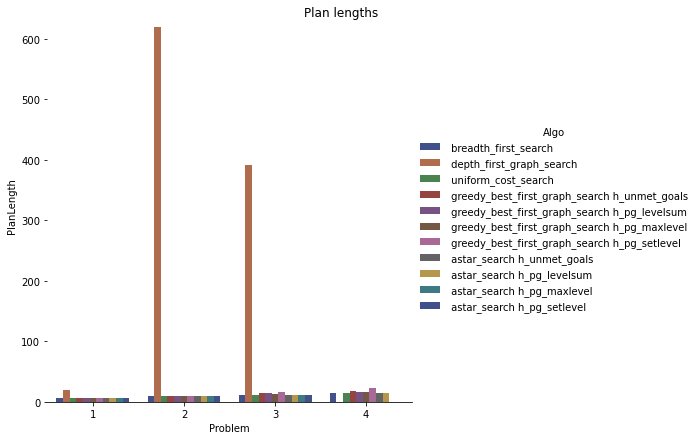

In [51]:
# Draw a nested barplot by species and sex
g = sns.catplot(
    data=df, kind="bar",
    x="Problem", y="PlanLength", hue="Algo",
    palette="dark",
    alpha=.8,
    height=6
)
g.despine(left=True)
g.fig.suptitle('Plan lengths')
plt.show()